In [28]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import cumtrapz
from numpy import sin, cos, pi
from mpl_toolkits.mplot3d import Axes3D

label_dict = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}



# Import Data
train_folder_dir = 'data/train/InertialSignals/'
train_x_names = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
train_y_name = 'data/train/y_train.txt'


# Empty Panda dataframe object
# Y is roll
column_names = ["ACC_X", "ACC_Y", "ACC_Z", "GYRO_X", "GYRO_Y", "GYRO_Z", "TOTAL_ACC_X", "TOTAL_ACC_Y", "TOTAL_ACC_Z"]

# Get Total Accelerations X, Y, Z for a desired trial
# each row is a trial

accel_x = pd.read_csv(train_folder_dir+train_x_names[6], 
    sep='\s+', header = None)
accel_y = pd.read_csv(train_folder_dir+train_x_names[7], 
    sep='\s+', header = None)
accel_z = pd.read_csv(train_folder_dir+train_x_names[8], 
    sep='\s+', header = None)
pitch = pd.read_csv(train_folder_dir+train_x_names[3], 
    sep='\s+', header = None)
roll = pd.read_csv(train_folder_dir+train_x_names[4], 
    sep='\s+', header = None)
yaw = pd.read_csv(train_folder_dir+train_x_names[5], 
    sep='\s+', header = None)

# Get Labels

data_y = pd.read_csv(train_y_name, header=None)

accel_x.describe()



,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.804024,0.804490,0.805592,0.806714,0.807533,0.807630,0.806811,0.806048,0.806092,0.806379,...,0.803666,0.804592,0.804801,0.804886,0.805102,0.805201,0.805676,0.805391,0.805355,0.806415
std,0.414103,0.413731,0.414390,0.414366,0.414288,0.414917,0.414225,0.413467,0.413144,0.414631,...,0.412315,0.412846,0.413158,0.414003,0.414470,0.414669,0.415405,0.415793,0.416229,0.417875
min,-0.405665,-0.399891,-0.407309,-0.407379,-0.406735,-0.407835,-0.409223,-0.414690,-0.411853,-0.433381,...,-0.415513,-0.415194,-0.410080,-0.406213,-0.418298,-0.420371,-0.419780,-0.422794,-0.415148,-0.411995
25%,0.665270,0.670202,0.671044,0.669066,0.673670,0.677031,0.677273,0.676533,0.674470,0.672430,...,0.670079,0.669431,0.673077,0.667271,0.670058,0.671773,0.664919,0.666741,0.663605,0.657181
50%,0.953989,0.955487,0.954558,0.956592,0.956969,0.955446,0.956018,0.955037,0.956419,0.956461,...,0.955766,0.955841,0.956903,0.958164,0.956956,0.956024,0.955775,0.955944,0.955019,0.956491
75%,1.019297,1.019451,1.019473,1.019481,1.019349,1.019092,1.019282,1.019258,1.019284,1.019325,...,1.019306,1.019270,1.019445,1.019494,1.019314,1.019078,1.019090,1.019215,1.018993,1.019425
max,2.104388,2.074192,2.083785,2.032520,2.109117,2.058101,2.125131,2.034239,2.073188,2.048707,...,2.050219,2.032361,2.157473,2.120588,2.064136,2.128677,2.072014,2.146415,2.119598,2.060867


WALKING


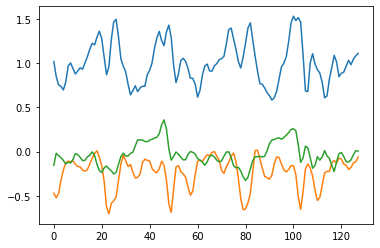

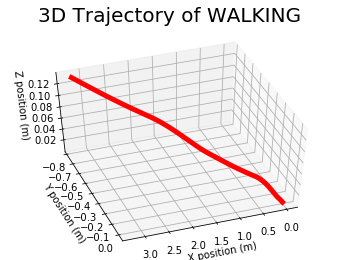

In [9]:
# Plot some sample data
trial = 80
plt.plot(accel_x.iloc[trial])
plt.plot(accel_y.iloc[trial])
plt.plot(accel_z.iloc[trial])
print(label_dict[int(data_y.iloc[trial])])
# Sampling Rate:
N = 128
f_s = 50
t_n = 2.56
dt = t_n / N
x = cumtrapz(cumtrapz(accel_x.iloc[trial], dx=dt), dx=dt)
y = cumtrapz(cumtrapz(accel_y.iloc[trial], dx=dt), dx=dt)
z = cumtrapz(cumtrapz(accel_z.iloc[trial], dx=dt), dx=dt)

# Plot 3D Trajectory
fig1, ax1 = plt.subplots()
label = label_dict[int(data_y.iloc[trial])]
fig1.suptitle("3D Trajectory of " + label, fontsize=20)
ax1 = plt.axes(projection='3d')
ax1.plot3D(x, y, -z, c='red', lw=5, label='trajectory')
ax1.set_xlabel('X position (m)')
ax1.set_ylabel('Y position (m)')
ax1.set_zlabel('Z position (m)')
ax1.view_init(50, 70)
plt.show()

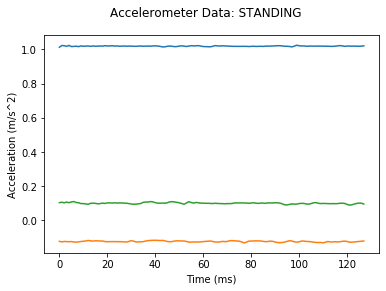

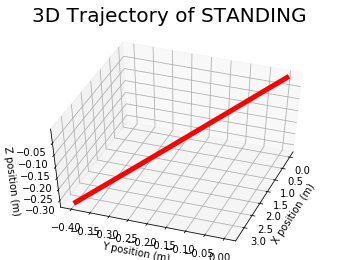

In [30]:
# Plot some sample data
trial = 0
label = label_dict[int(data_y.iloc[trial])]
fig5, ax5 = plt.subplots()
ax5.plot(accel_x.iloc[trial])
ax5.plot(accel_y.iloc[trial])
ax5.plot(accel_z.iloc[trial])
fig5.suptitle("Accelerometer Data: " + label)
ax5.set_xlabel("Time (ms)")
ax5.set_ylabel("Acceleration (m/s^2)")
# Sampling Rate:
N = 128
f_s = 50
t_n = 2.56
dt = t_n / N
x = cumtrapz(cumtrapz(accel_x.iloc[trial], dx=dt), dx=dt)
y = cumtrapz(cumtrapz(accel_y.iloc[trial], dx=dt), dx=dt)
z = cumtrapz(cumtrapz(accel_z.iloc[trial], dx=dt), dx=dt)

# Plot 3D Trajectory
fig2, ax2 = plt.subplots()

fig2.suptitle("3D Trajectory of " + label, fontsize=20)
ax2 = plt.axes(projection='3d')
ax2.plot3D(x, y, -z, c='red', lw=5, label='trajectory')
ax2.set_xlabel('X position (m)')
ax2.set_ylabel('Y position (m)')
ax2.set_zlabel('Z position (m)')
ax2.view_init(50, 20)
plt.show()

In [27]:
# Reshape data together
# Get two walking and two standing
# Then save to text
# Convert Dataframe into numpy array
standing1 = 0
standing2 = 1
walking1 = 80
walking2 = 81

desired_trials = [0, 1, 80, 81]
desired_trial_filenames = ["Stand1", "Stand2", "Walk1", "Walk2"]

for i in range(len(desired_trials)):
    index = desired_trials[i]
    wx = accel_x.iloc[index]
    wy = accel_y.iloc[index]
    wz = accel_z.iloc[index]
    wp = pitch.iloc[index]
    wr = roll.iloc[index]
    wy = yaw.iloc[index]


    # Append the data together
    frames = [wx, wy, wz, wp, wr, wy]
    result = pd.concat(frames, axis=1)
    result_np = result.to_numpy()
    # save data to a text fle
    print(desired_trial_filenames[i])
    np.savetxt(desired_trial_filenames[i] + ".txt", result_np)

Stand1
Stand2
Walk1
Walk2
